Reading Files

In [87]:
import pandas as pd
cab = pd.read_csv('Cab_Data.csv')
city = pd.read_csv('City.csv')
customer = pd.read_csv('Customer_ID.csv')
transaction = pd.read_csv('Transaction_ID.csv')
holidays = pd.read_csv('US Holiday Dates (2004-2021).csv')

Data Wrangling and Cleaning

In [88]:
# starting the cab data cleaning
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [89]:
cab.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [90]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [91]:
cab.shape

(359392, 7)

In [92]:
cab['Date of Travel'].describe()

count    359392.000000
mean      42964.067998
std         307.467197
min       42371.000000
25%       42697.000000
50%       42988.000000
75%       43232.000000
max       43465.000000
Name: Date of Travel, dtype: float64

In [93]:
# There are 1065 days between 01-31-2016 and 12-31-2018, so we will check the range of the dates
cab['Date of Travel'].max() - cab['Date of Travel'].min() + 1

1095

In [94]:
# Based on the output I will assume the actual dates are between 01-01-2016 and 12-31-2018 since that math works out.
Start_Date = pd.to_datetime('2016-01-01') # setting a start date
cab['Date'] = pd.to_timedelta(cab['Date of Travel'] - cab['Date of Travel'].min(), unit='D') + Start_Date # creating an actual date variable from the date of travel variable
cab['Day of the Week'] = cab['Date'].dt.day_name() # creating a day of the week variable
del cab['Date of Travel']
cab.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Day of the Week
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016-01-07,Thursday
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016-01-05,Tuesday
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,2016-01-01,Friday
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,2016-01-06,Wednesday
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,2016-01-02,Saturday


In [95]:
cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [96]:
cab[cab['City'] == 'Washington DC'] = 'District of Columbia' # changing washington DC to district of columbia
cab['State'] = cab['City'].str.extract(r'(\s\w{2}$)', expand = False) # extracting the state abbreviation from City
cab['City'] = cab['City'].str.replace(r'\s\w{2}$', '') # removing the state abbreviation from City
cab['State'][cab['City'] == 'ORANGE COUNTY'] = 'CA' # giving ORANGE COUNTY its state
cab['State'][cab['City'] == 'SILICON VALLEY'] = 'CA' # giving SILICON VALLEY its state
cab['State'][cab['City'] == 'District of Columbia'] = 'DC' # giving District of Columbia its state
cab['City'] = cab['City'].str.title() # putting the city in title from, all lower case except first letter
cab.head()

<ipython-input-96-a528b33bd3fa>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cab['City'] = cab['City'].str.replace(r'\s\w{2}$', '') # removing the state abbreviation from City


,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Day of the Week,State
0,10000011,Pink Cab,Atlanta,30.45,370.95,313.635,2016-01-07 00:00:00,Thursday,GA
1,10000012,Pink Cab,Atlanta,28.62,358.52,334.854,2016-01-05 00:00:00,Tuesday,GA
2,10000013,Pink Cab,Atlanta,9.04,125.2,97.632,2016-01-01 00:00:00,Friday,GA
3,10000014,Pink Cab,Atlanta,33.17,377.4,351.602,2016-01-06 00:00:00,Wednesday,GA
4,10000015,Pink Cab,Atlanta,8.73,114.62,97.776,2016-01-02 00:00:00,Saturday,GA


In [97]:
cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [98]:
cab['Miles Travelled'] = cab['KM Travelled'] * 0.62137 # converting KM to miles
del cab['KM Travelled']
cab.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,State,Miles Travelled
0,10000011,Pink Cab,Atlanta,370.95,313.635,2016-01-07 00:00:00,Thursday,GA,18.920716
1,10000012,Pink Cab,Atlanta,358.52,334.854,2016-01-05 00:00:00,Tuesday,GA,17.783609
2,10000013,Pink Cab,Atlanta,125.2,97.632,2016-01-01 00:00:00,Friday,GA,5.617185
3,10000014,Pink Cab,Atlanta,377.4,351.602,2016-01-06 00:00:00,Wednesday,GA,20.610843
4,10000015,Pink Cab,Atlanta,114.62,97.776,2016-01-02 00:00:00,Saturday,GA,5.42456


In [99]:
cab['Date'] = pd.to_datetime(cab['Date']).dt.normalize() # removing the time parameter from the date variable
cab.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,State,Miles Travelled
0,10000011,Pink Cab,Atlanta,370.95,313.635,2016-01-07,Thursday,GA,18.920716
1,10000012,Pink Cab,Atlanta,358.52,334.854,2016-01-05,Tuesday,GA,17.783609
2,10000013,Pink Cab,Atlanta,125.2,97.632,2016-01-01,Friday,GA,5.617185
3,10000014,Pink Cab,Atlanta,377.4,351.602,2016-01-06,Wednesday,GA,20.610843
4,10000015,Pink Cab,Atlanta,114.62,97.776,2016-01-02,Saturday,GA,5.42456


In [100]:
# starting the city data cleaning
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [101]:
city.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [102]:
city.dtypes

City          object
Population    object
Users         object
dtype: object

In [103]:
city['City'].unique()

array(['NEW YORK NY', 'CHICAGO IL', 'LOS ANGELES CA', 'MIAMI FL',
       'SILICON VALLEY', 'ORANGE COUNTY', 'SAN DIEGO CA', 'PHOENIX AZ',
       'DALLAS TX', 'ATLANTA GA', 'DENVER CO', 'AUSTIN TX', 'SEATTLE WA',
       'TUCSON AZ', 'SAN FRANCISCO CA', 'SACRAMENTO CA', 'PITTSBURGH PA',
       'WASHINGTON DC', 'NASHVILLE TN', 'BOSTON MA'], dtype=object)

In [104]:
# identical process as what was done to the city variable in the cab dataset
city[city['City'] == 'Washington DC'] = 'District of Columbia'
city['State'] = city['City'].str.extract(r'(\s\w{2}$)', expand = False)
city['City'] = city['City'].str.replace(r'\s\w{2}$', '')
city['State'][city['City'] == 'ORANGE COUNTY'] = 'CA'
city['State'][city['City'] == 'SILICON VALLEY'] = 'CA'
city['State'][city['City'] == 'District of Columbia'] = 'DC'
city['City'] = city['City'].str.title()
city.head()

<ipython-input-104-57d2c2f0fae8>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  city['City'] = city['City'].str.replace(r'\s\w{2}$', '')


,City,Population,Users,State
0,New York,"8,405,837","302,149",NY
1,Chicago,"1,955,130","164,468",IL
2,Los Angeles,"1,595,037","144,132",CA
3,Miami,"1,339,155","17,675",FL
4,Silicon Valley,"1,177,609","27,247",CA


In [105]:
# The amount of unique cities in our city and cab df are different so lets see which city in the city df isn't in the cab df
for x in city['City'].unique():
    if x not in cab['City'].unique():
        print(x)

San Francisco


In [106]:
# removing San Francisco from this dataframe
city = city[city['City'] != 'San Francisco']
city['City'].unique()

array(['New York', 'Chicago', 'Los Angeles', 'Miami', 'Silicon Valley',
       'Orange County', 'San Diego', 'Phoenix', 'Dallas', 'Atlanta',
       'Denver', 'Austin', 'Seattle', 'Tucson', 'Sacramento',
       'Pittsburgh', 'Washington', 'Nashville', 'Boston'], dtype=object)

In [107]:
city.dtypes

City          object
Population    object
Users         object
State         object
dtype: object

In [108]:
city['Population'] = city['Population'].str.replace(r',','').str.strip().astype(int) # changing the Population variable to integer
city['Users'] = city['Users'].str.replace(r',','').str.strip().astype(int) # changing the Users variable to integer
city.head()

,City,Population,Users,State
0,New York,8405837,302149,NY
1,Chicago,1955130,164468,IL
2,Los Angeles,1595037,144132,CA
3,Miami,1339155,17675,FL
4,Silicon Valley,1177609,27247,CA


In [109]:
# Starting the customer dataframe cleaning
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [110]:
customer.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [111]:
customer.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [112]:
customer['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [113]:
# This data set looks clean already

In [114]:
# starting the transaction data set cleaning
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [115]:
transaction.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [116]:
transaction.dtypes

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object

In [117]:
transaction['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [118]:
# this data set is also already clean

In [119]:
holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [120]:
holidays.isna().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

In [121]:
del holidays['WeekDay']
del holidays['Month']
del holidays['Day']
del holidays['Year']

In [122]:
holidays['Holiday'].unique()

array(['4th of July', 'Christmas Day', 'Christmas Eve', 'Columbus Day',
       'Eastern Easter', 'Juneteenth', 'Labor Day', 'Labor Day Weekend',
       'Martin Luther King, Jr. Day', 'Memorial Day', "New Year's Day",
       'New Year’s Eve', 'Thanksgiving Day', 'Thanksgiving Eve',
       'Valentine’s Day', 'Veterans Day', "Washington's Birthday",
       'Western Easter'], dtype=object)

In [123]:
# i will remove some holidays since they usually don't affect daily life
badhol = ['Columbus Day', 'Juneteenth', 'Thanksgiving Eve',"Washington's Birthday", 'Martin Luther King, Jr. Day']
for x in badhol:
    holidays = holidays[holidays['Holiday'] != x]
holidays['Holiday'].unique()

array(['4th of July', 'Christmas Day', 'Christmas Eve', 'Eastern Easter',
       'Labor Day', 'Labor Day Weekend', 'Memorial Day', "New Year's Day",
       'New Year’s Eve', 'Thanksgiving Day', 'Valentine’s Day',
       'Veterans Day', 'Western Easter'], dtype=object)

In [124]:
holidays.reset_index(inplace = True) # resetting the index however it isnt necessary
del holidays['index'] # removing the index variable that was introduced when resetting index
holidays['Date'] = pd.to_datetime(holidays['Date']).dt.normalize() # setting the date variable to datetime
holidays.head()

,Date,Holiday
0,2004-07-04,4th of July
1,2005-07-04,4th of July
2,2006-07-04,4th of July
3,2007-07-04,4th of July
4,2008-07-04,4th of July


In [125]:
# inner joining cab and city on the City variable. Inner join so we only include complete rows of data
df = pd.merge(cab, city, how = 'inner', on = 'City')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  object        
 1   Company          359392 non-null  object        
 2   City             359392 non-null  object        
 3   Price Charged    359392 non-null  object        
 4   Cost of Trip     359392 non-null  object        
 5   Date             359392 non-null  datetime64[ns]
 6   Day of the Week  359392 non-null  object        
 7   State_x          359392 non-null  object        
 8   Miles Travelled  359392 non-null  object        
 9   Population       359392 non-null  int32         
 10  Users            359392 non-null  int32         
 11  State_y          359392 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(9)
memory usage: 32.9+ MB


In [126]:
# inner joining df and transaction on the transaction variable.
df = pd.merge(df, transaction, how = 'inner', on = 'Transaction ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Transaction ID   359392 non-null  object        
 1   Company          359392 non-null  object        
 2   City             359392 non-null  object        
 3   Price Charged    359392 non-null  object        
 4   Cost of Trip     359392 non-null  object        
 5   Date             359392 non-null  datetime64[ns]
 6   Day of the Week  359392 non-null  object        
 7   State_x          359392 non-null  object        
 8   Miles Travelled  359392 non-null  object        
 9   Population       359392 non-null  int32         
 10  Users            359392 non-null  int32         
 11  State_y          359392 non-null  object        
 12  Customer ID      359392 non-null  int64         
 13  Payment_Mode     359392 non-null  object        
dtypes: datetime64[ns](1)

In [127]:
# inner joining df and customer on the customer id variable
df = pd.merge(df, customer, how = 'inner', on = 'Customer ID')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  object        
 1   Company             359392 non-null  object        
 2   City                359392 non-null  object        
 3   Price Charged       359392 non-null  object        
 4   Cost of Trip        359392 non-null  object        
 5   Date                359392 non-null  datetime64[ns]
 6   Day of the Week     359392 non-null  object        
 7   State_x             359392 non-null  object        
 8   Miles Travelled     359392 non-null  object        
 9   Population          359392 non-null  int32         
 10  Users               359392 non-null  int32         
 11  State_y             359392 non-null  object        
 12  Customer ID         359392 non-null  int64         
 13  Payment_Mode        359392 no

In [128]:
# left joining df and holidays on the Date variable. An inner join would result in only rows whose date correspond to a holiday
df = pd.merge(df, holidays, how = 'left', on = 'Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359565 entries, 0 to 359564
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359565 non-null  object        
 1   Company             359565 non-null  object        
 2   City                359565 non-null  object        
 3   Price Charged       359565 non-null  object        
 4   Cost of Trip        359565 non-null  object        
 5   Date                359565 non-null  datetime64[ns]
 6   Day of the Week     359565 non-null  object        
 7   State_x             359565 non-null  object        
 8   Miles Travelled     359565 non-null  object        
 9   Population          359565 non-null  int32         
 10  Users               359565 non-null  int32         
 11  State_y             359565 non-null  object        
 12  Customer ID         359565 non-null  int64         
 13  Payment_Mode        359565 no

In [129]:
# We can see that our data frame as more rows. Probably due to overlapping holiday dates, introducing duplicates
dupes = df[df['Transaction ID'].duplicated()]
dupes

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,State_x,Miles Travelled,Population,Users,State_y,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday
1207,10165379,Yellow Cab,Atlanta,478.51,329.346,2017-04-16,Sunday,GA,15.93814,814885,24701,GA,28442,Card,Female,25,14655,Western Easter
1373,10165383,Yellow Cab,Atlanta,828.52,617.76,2017-04-16,Sunday,GA,29.080116,814885,24701,GA,29813,Card,Male,22,25325,Western Easter
4424,10163062,Yellow Cab,Atlanta,198.51,110.9184,2017-04-16,Sunday,GA,5.418346,814885,24701,GA,29186,Cash,Female,34,18572,Western Easter
5678,10163070,Yellow Cab,Atlanta,330.27,190.944,2017-04-16,Sunday,GA,9.693372,814885,24701,GA,29380,Card,Male,41,9598,Western Easter
5685,10163071,Yellow Cab,Atlanta,978.84,520.884,2017-04-16,Sunday,GA,25.445101,814885,24701,GA,27599,Card,Male,65,2878,Western Easter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342143,10165346,Pink Cab,Washington,290.46,287.385,2017-04-16,Sunday,DC,17.006897,418859,127001,DC,51616,Cash,Female,55,24106,Western Easter
342513,10163037,Pink Cab,Washington,617.43,429.048,2017-04-16,Sunday,DC,26.395798,418859,127001,DC,52088,Card,Male,33,3723,Western Easter
349878,10166947,Yellow Cab,Washington,726.27,447.8208,2017-04-16,Sunday,DC,20.704048,418859,127001,DC,51053,Card,Female,18,15236,Western Easter
355634,10166941,Yellow Cab,Washington,109.42,81.396,2017-04-16,Sunday,DC,3.541809,418859,127001,DC,53631,Card,Male,30,19210,Western Easter


In [130]:
df = df.drop_duplicates(subset = 'Transaction ID') # removing duplicates
df['State'] = df['State_x']
del df['State_x']
del df['State_y']
df.shape

(359392, 17)

In [131]:
# our joined data frame now has the same amount of rows as the cab dataframe which is desired.
df.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,State
0,10000011,Pink Cab,Atlanta,370.95,313.635,2016-01-07,Thursday,18.920716,814885,24701,29290,Card,Male,28,10813,NaN,GA
1,10351127,Yellow Cab,Atlanta,598.7,317.4228,2018-07-20,Friday,16.27368,814885,24701,29290,Cash,Male,28,10813,NaN,GA
2,10412921,Yellow Cab,Atlanta,792.05,597.402,2018-11-22,Thursday,26.439293,814885,24701,29290,Card,Male,28,10813,Thanksgiving Day,GA
3,10000012,Pink Cab,Atlanta,358.52,334.854,2016-01-05,Tuesday,17.783609,814885,24701,27703,Card,Male,27,9237,NaN,GA
4,10320494,Yellow Cab,Atlanta,721.1,467.1192,2018-04-20,Friday,22.605441,814885,24701,27703,Card,Male,27,9237,NaN,GA


In [132]:
# I will make the holiday variable a binary variable to indicate if the day is a holiday or not
import numpy as np
df['Holiday'] = df['Holiday'].replace(np.nan, 0) # replacing NaN with 0
df['Holiday'][df['Holiday'] != 0] = 1 # replacing holiday names with 1
df.head()

<ipython-input-132-860f1afd9966>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Holiday'][df['Holiday'] != 0] = 1 # replacing holiday names with 1


,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,State
0,10000011,Pink Cab,Atlanta,370.95,313.635,2016-01-07,Thursday,18.920716,814885,24701,29290,Card,Male,28,10813,0,GA
1,10351127,Yellow Cab,Atlanta,598.7,317.4228,2018-07-20,Friday,16.27368,814885,24701,29290,Cash,Male,28,10813,0,GA
2,10412921,Yellow Cab,Atlanta,792.05,597.402,2018-11-22,Thursday,26.439293,814885,24701,29290,Card,Male,28,10813,1,GA
3,10000012,Pink Cab,Atlanta,358.52,334.854,2016-01-05,Tuesday,17.783609,814885,24701,27703,Card,Male,27,9237,0,GA
4,10320494,Yellow Cab,Atlanta,721.1,467.1192,2018-04-20,Friday,22.605441,814885,24701,27703,Card,Male,27,9237,0,GA


In [133]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip'] # creating a profit variable
df['Percent Profit'] =  (df['Price Charged'] / df['Cost of Trip']) - 1 # creating a percent profit variable
df.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Holiday,State,Profit,Percent Profit
0,10000011,Pink Cab,Atlanta,370.95,313.635,2016-01-07,Thursday,18.920716,814885,24701,29290,Card,Male,28,10813,0,GA,57.315,0.182744
1,10351127,Yellow Cab,Atlanta,598.7,317.4228,2018-07-20,Friday,16.27368,814885,24701,29290,Cash,Male,28,10813,0,GA,281.2772,0.886128
2,10412921,Yellow Cab,Atlanta,792.05,597.402,2018-11-22,Thursday,26.439293,814885,24701,29290,Card,Male,28,10813,1,GA,194.648,0.325824
3,10000012,Pink Cab,Atlanta,358.52,334.854,2016-01-05,Tuesday,17.783609,814885,24701,27703,Card,Male,27,9237,0,GA,23.666,0.070676
4,10320494,Yellow Cab,Atlanta,721.1,467.1192,2018-04-20,Friday,22.605441,814885,24701,27703,Card,Male,27,9237,0,GA,253.9808,0.543717


In [134]:
df.dtypes

Transaction ID                object
Company                       object
City                          object
Price Charged                 object
Cost of Trip                  object
Date                  datetime64[ns]
Day of the Week               object
Miles Travelled               object
Population                     int32
Users                          int32
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Holiday                       object
State                         object
Profit                        object
Percent Profit                object
dtype: object

In [135]:
# fixing some variable types that may have been changed while joining. Not too sure what the cause was
df['Price Charged'] = df['Price Charged'].astype(int)
df['Cost of Trip'] = df['Cost of Trip'].astype(int)
df['Miles Travelled'] = df['Miles Travelled'].astype(int)
df['Holiday'] = df['Holiday'].astype(int)
df['Profit'] = df['Profit'].astype(int)
df['Percent Profit'] = df['Percent Profit'].astype(float)
df.dtypes

Transaction ID                object
Company                       object
City                          object
Price Charged                  int32
Cost of Trip                   int32
Date                  datetime64[ns]
Day of the Week               object
Miles Travelled                int32
Population                     int32
Users                          int32
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Holiday                        int32
State                         object
Profit                         int32
Percent Profit               float64
dtype: object

In [136]:
# splitting date variable into month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['MonthYear'] = df['Date'].dt.strftime('%Y-%m')

In [137]:
df.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,...,Gender,Age,Income (USD/Month),Holiday,State,Profit,Percent Profit,Month,Year,MonthYear
0,10000011,Pink Cab,Atlanta,370,313,2016-01-07,Thursday,18,814885,24701,...,Male,28,10813,0,GA,57,0.182744,1,2016,2016-01
1,10351127,Yellow Cab,Atlanta,598,317,2018-07-20,Friday,16,814885,24701,...,Male,28,10813,0,GA,281,0.886128,7,2018,2018-07
2,10412921,Yellow Cab,Atlanta,792,597,2018-11-22,Thursday,26,814885,24701,...,Male,28,10813,1,GA,194,0.325824,11,2018,2018-11
3,10000012,Pink Cab,Atlanta,358,334,2016-01-05,Tuesday,17,814885,24701,...,Male,27,9237,0,GA,23,0.070676,1,2016,2016-01
4,10320494,Yellow Cab,Atlanta,721,467,2018-04-20,Friday,22,814885,24701,...,Male,27,9237,0,GA,253,0.543717,4,2018,2018-04


Analysis

In [138]:
# all analysis will be done without knowledge of what happens in the future such as COVID.

In [139]:
# lets start by seeing which company makes more money per transaction
df.groupby('Company')['Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,62.284119,77.450843,-220.0,11.0,41.0,93.0,1119.0
Yellow Cab,274681.0,159.809961,171.771288,-176.0,37.0,101.0,228.0,1463.0


In [140]:
# we can see that yellow cab company makes more profit per transaction

In [141]:
df.groupby('Company')['Percent Profit'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,84711.0,0.255596,0.249565,-0.409338,0.080377,0.221544,0.394536,2.754513
Yellow Cab,274681.0,0.542966,0.445480,-0.352983,0.196803,0.428399,0.826903,3.202146


In [142]:
# yellow cab company also makes more percent profit per transaction

In [143]:
# how does gender effect profit?
df.groupby(['Company','Gender'])['Profit'].describe()

count        mean         std    min   25%    50%  \
Company    Gender                                                         
Pink Cab   Female   37480.0   61.816596   77.300334 -220.0  11.0   41.0   
           Male     47231.0   62.655121   77.568885 -168.0  11.0   41.0   
Yellow Cab Female  116000.0  155.855405  168.042271 -176.0  36.0   99.0   
           Male    158681.0  162.700846  174.390668 -145.0  37.0  103.0   

                     75%     max  
Company    Gender                 
Pink Cab   Female   93.0  1119.0  
           Male     94.0  1056.0  
Yellow Cab Female  222.0  1433.0  
           Male    233.0  1463.0

In [144]:
# is the difference between groups statistically significant?
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Profit ~ C(Company) + C(Gender) + C(Company):C(Gender)', data = df).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Company),1.0,6.157997e+08,6.157997e+08,25705.365318,0.000000e+00
C(Gender),1.0,2.580103e+06,2.580103e+06,107.701394,3.150609e-25
C(Company):C(Gender),1.0,5.747897e+05,5.747897e+05,23.993485,9.670414e-07
Residual,359388.0,8.609526e+09,2.395607e+04,NaN,NaN


In [145]:
# we can see that there is a statistically significant difference between the groups for company in gender when it comes to profit made by the transaction.

In [146]:
df['Percent_Profit'] = df['Percent Profit']
model = ols('Percent_Profit ~ C(Company) + C(Gender) + C(Company):C(Gender)', data = df).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Company),1.0,5346.684772,5346.684772,32157.773082,0.000000e+00
C(Gender),1.0,28.081413,28.081413,168.896381,1.315011e-38
C(Company):C(Gender),1.0,5.517380,5.517380,33.184426,8.388723e-09
Residual,359388.0,59753.339942,0.166264,NaN,NaN


In [147]:
# the same applies for percent profit

In [199]:
model = ols('Percent_Profit ~ C(Gender)', data = df[df['Company'] == 'Pink Cab']).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,0.283926,0.283926,4.558851,0.032752
Residual,84709.0,5275.688674,0.062280,NaN,NaN


In [200]:
model = ols('Percent_Profit ~ C(Gender)', data = df[df['Company'] == 'Yellow Cab']).fit()
sm.stats.anova_lm(model, type = 2)

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,33.314867,33.314867,167.975202,2.102319e-38
Residual,274679.0,54477.651268,0.198332,NaN,NaN


In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'white')

[Text(0, 0.5, 'Transactions'),
 Text(0.5, 1.0, 'Amount of Transactions per Company')]

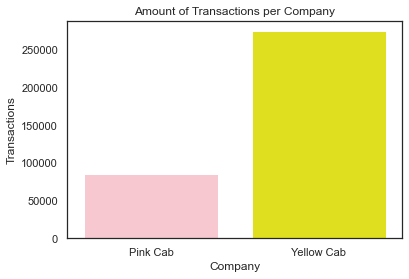

In [149]:
# Checking how many transactions have been completed for each company
sns.countplot(x = 'Company', data = df, palette = ['pink','yellow']).set(ylabel = 'Transactions', title = 'Amount of Transactions per Company')

[Text(0, 0.5, 'Transactions'),
 Text(0.5, 1.0, 'Amount of Transactions per Company')]

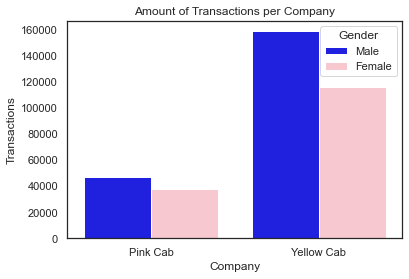

In [150]:
# grouped by gender
sns.countplot(x = 'Company', data = df, hue = 'Gender', palette = ['blue','pink']).set(ylabel = 'Transactions', title = 'Amount of Transactions per Company')

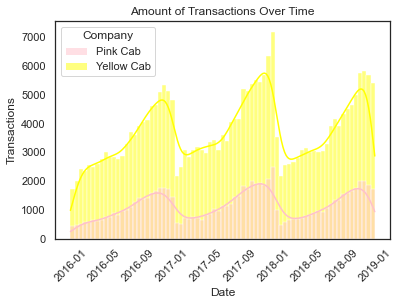

In [151]:
# Transaction per year grouped by company
sns.histplot(x = 'Date', hue = 'Company', palette = ['pink','yellow'], data = df, kde = True).set(ylabel = 'Transactions', title = 'Amount of Transactions Over Time')
plt.xticks(rotation = 45)
plt.show()

In [152]:
# The plot clearly shows that there is seasonality in the amount of transactions and that both companies follow the same trend. There also doesn't appear to be growth in quantity of transactions for both companies

In [153]:
plotdata = df.groupby(['Company','MonthYear'], as_index = False)[['Price Charged','Cost of Trip', 'Profit','Miles Travelled']].sum()
plotdata['Percent Profit'] = plotdata['Price Charged'] / plotdata['Cost of Trip'] - 1
plotdata['Cost per Mile'] = plotdata['Cost of Trip'] / plotdata['Miles Travelled']
plotdata

,Company,MonthYear,Price Charged,Cost of Trip,Profit,Miles Travelled,Percent Profit,Cost per Mile
0,Pink Cab,2016-01,307977,233780,73887,12741,0.317380,18.348638
1,Pink Cab,2016-02,345656,257298,87962,14063,0.343407,18.296096
2,Pink Cab,2016-03,398926,310631,87776,16954,0.284244,18.321989
3,Pink Cab,2016-04,397547,311490,85568,17001,0.276275,18.321863
4,Pink Cab,2016-05,431525,373931,57236,20456,0.154023,18.279771
...,...,...,...,...,...,...,...,...
67,Yellow Cab,2018-08,3490241,2550297,936541,115919,0.368563,22.000682
68,Yellow Cab,2018-09,3770772,2593406,1173078,117943,0.453984,21.988639
69,Yellow Cab,2018-10,4187228,2906572,1275962,132190,0.440607,21.987836
70,Yellow Cab,2018-11,4910787,3447083,1458483,156777,0.424621,21.987173


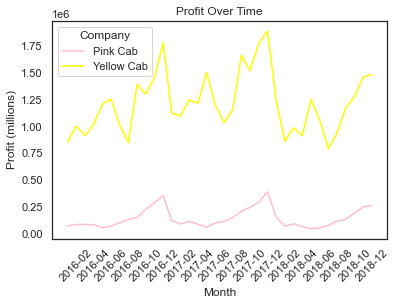

In [154]:
plot = sns.lineplot(x = 'MonthYear', y = 'Profit', hue = 'Company', palette = ['pink','yellow'], data = plotdata)
plt.xlabel('Month')
plt.ylabel('Profit (millions)')
plt.title('Profit Over Time')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

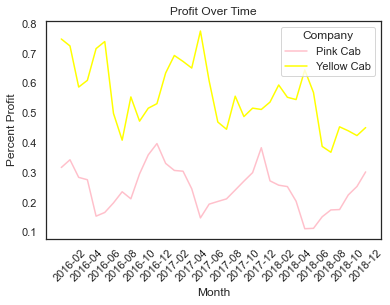

In [155]:
plot = sns.lineplot(x = 'MonthYear', y = 'Percent Profit', hue = 'Company', palette = ['pink','yellow'], data = plotdata)
plt.xlabel('Month')
plt.ylabel('Percent Profit')
plt.title('Profit Over Time')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

In [156]:
# the percent profit for yellow cab is much larger than for pink cab however, yellow cab's percent per profit seems to be on the decline. Could this be because cost of travel is increasing or are they simply charging less? If it is the former, that could indicate possible inefficiency in cab model used. Let's check the cost of the trip per mile travelled

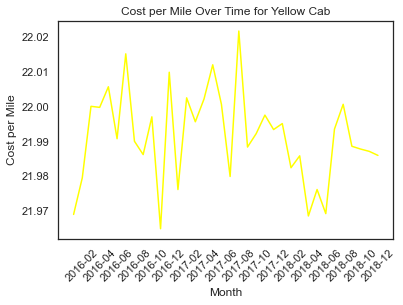

In [157]:
plot = sns.lineplot(x = 'MonthYear', y = 'Cost per Mile', color = 'yellow', data = plotdata[plotdata['Company'] == 'Yellow Cab'])
plt.xlabel('Month')
plt.title('Cost per Mile Over Time for Yellow Cab')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

In [158]:
# The plot does not show an increase in cost per mile and the scale for the y-axis is very small so any change in price on that scale is negligible. Let's check the efficiency of Pink Cab

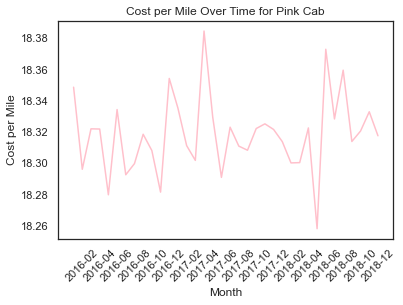

In [159]:
plot = sns.lineplot(x = 'MonthYear', y = 'Cost per Mile', color = 'pink', data = plotdata[plotdata['Company'] == 'Pink Cab'])
plt.xlabel('Month')
plt.title('Cost per Mile Over Time for Pink Cab')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

In [160]:
# The same can be said about pink cab

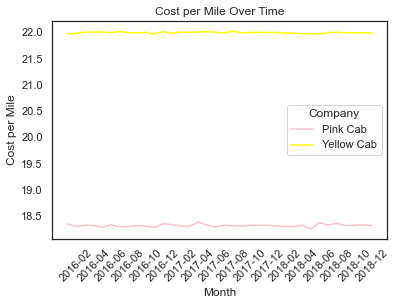

In [161]:
plot = sns.lineplot(x = 'MonthYear', y = 'Cost per Mile', hue = 'Company', palette = ['pink','yellow'], data = plotdata)
plt.xlabel('Month')
plt.title('Cost per Mile Over Time')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

In [162]:
# we can see that pink cab is more efficient than yellow can in terms of money spent per mile. Let's see if there is correlation between profit earned and gender.

In [163]:
plotdata2 = df.groupby(['Company','MonthYear','Gender'], as_index = False)[['Price Charged','Cost of Trip', 'Profit','Miles Travelled']].sum()
plotdata2['Percent Profit'] = plotdata2['Price Charged'] / plotdata2['Cost of Trip'] - 1
plotdata2['Cost per Mile'] = plotdata2['Cost of Trip'] / plotdata2['Miles Travelled']
plotdata2

,Company,MonthYear,Gender,Price Charged,Cost of Trip,Profit,Miles Travelled,Percent Profit,Cost per Mile
0,Pink Cab,2016-01,Female,18240,13219,5005,715,0.379832,18.488112
1,Pink Cab,2016-01,Male,289737,220561,68882,12026,0.313637,18.340346
2,Pink Cab,2016-02,Female,157117,116375,40576,6360,0.350092,18.297956
3,Pink Cab,2016-02,Male,188539,140923,47386,7703,0.337887,18.294561
4,Pink Cab,2016-03,Female,188430,146697,41475,8006,0.284484,18.323382
...,...,...,...,...,...,...,...,...,...
139,Yellow Cab,2018-10,Male,2392285,1648721,740913,74996,0.450994,21.984119
140,Yellow Cab,2018-11,Female,2086225,1477672,606346,67105,0.411832,22.020297
141,Yellow Cab,2018-11,Male,2824562,1969411,852137,89672,0.434217,21.962385
142,Yellow Cab,2018-12,Female,2022541,1405915,614518,63992,0.438594,21.970168


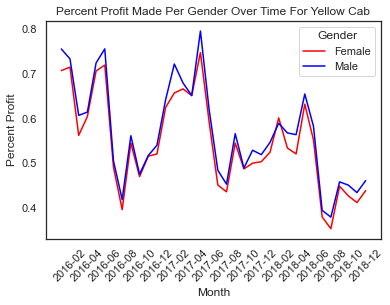

In [164]:
plot = sns.lineplot(x = 'MonthYear', y = 'Percent Profit', hue = 'Gender', palette = ['red', 'blue'], data = plotdata2[plotdata2['Company'] == 'Yellow Cab'])
plt.xlabel('Month')
plt.title('Percent Profit Made Per Gender Over Time For Yellow Cab')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

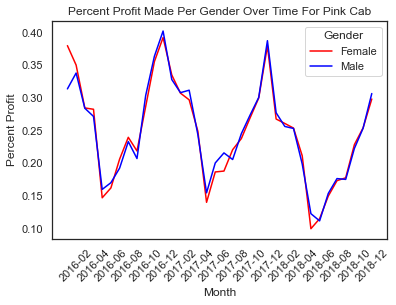

In [165]:
plot = sns.lineplot(x = 'MonthYear', y = 'Percent Profit', hue = 'Gender', palette = ['red', 'blue'],  data = plotdata2[plotdata2['Company'] == 'Pink Cab'])
plt.xlabel('Month')
plt.title('Percent Profit Made Per Gender Over Time For Pink Cab')
plt.xticks(rotation = 45)
plt.setp(plot.get_xticklabels()[::2], visible = False)
plt.show()

In [166]:
# from the two graphs, it appears that gender bias may be present in Yellow Cab but not in Pink Cab as we see that the percent profit made off of males is higher in almost every month. In the case of pink cab, this is not seen. This matches up with the ANOVA performed earlier

In [167]:
df.groupby(['Company','Year'])['State'].unique()

Company     Year
Pink Cab    2016    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
            2017    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
            2018    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
Yellow Cab  2016    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
            2017    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
            2018    [ GA,  TX,  MA,  IL,  CO,  CA,  FL,  TN,  NY, ...
Name: State, dtype: object

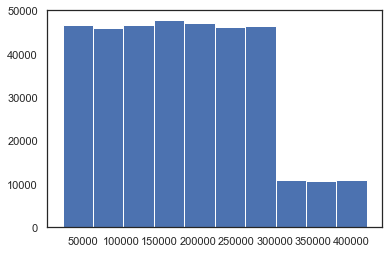

In [168]:
df['YearlySalary'] = df['Income (USD/Month)'] * 12
df['IncomeCat'] = pd.cut(df['YearlySalary'], bins = [0, 50000, 100000, 200000, 500000], labels = ['Low','Mid','High','Top'])
plt.hist(x = 'YearlySalary', data = df)
plt.show()

In [169]:
model2 = ols('Percent_Profit ~ C(Company) + C(IncomeCat) + C(Company)*C(IncomeCat)', data = df).fit()
res = sm.stats.anova_lm(model2, type = 2)
print(res)

                               df        sum_sq      mean_sq             F  \
C(Company)                    1.0   5346.684772  5346.684772  32145.209388   
C(IncomeCat)                  3.0      9.621695     3.207232     19.282441   
C(Company):C(IncomeCat)       3.0      1.288306     0.429435      2.581841   
Residual                 359384.0  59776.028734     0.166329           NaN   

                               PR(>F)  
C(Company)               0.000000e+00  
C(IncomeCat)             1.698221e-12  
C(Company):C(IncomeCat)  5.157609e-02  
Residual                          NaN  


In [170]:
df.head()

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,...,Holiday,State,Profit,Percent Profit,Month,Year,MonthYear,Percent_Profit,YearlySalary,IncomeCat
0,10000011,Pink Cab,Atlanta,370,313,2016-01-07,Thursday,18,814885,24701,...,0,GA,57,0.182744,1,2016,2016-01,0.182744,129756,High
1,10351127,Yellow Cab,Atlanta,598,317,2018-07-20,Friday,16,814885,24701,...,0,GA,281,0.886128,7,2018,2018-07,0.886128,129756,High
2,10412921,Yellow Cab,Atlanta,792,597,2018-11-22,Thursday,26,814885,24701,...,1,GA,194,0.325824,11,2018,2018-11,0.325824,129756,High
3,10000012,Pink Cab,Atlanta,358,334,2016-01-05,Tuesday,17,814885,24701,...,0,GA,23,0.070676,1,2016,2016-01,0.070676,110844,High
4,10320494,Yellow Cab,Atlanta,721,467,2018-04-20,Friday,22,814885,24701,...,0,GA,253,0.543717,4,2018,2018-04,0.543717,110844,High


In [171]:
df[df['Company'] == 'Pink Cab']

,Transaction ID,Company,City,Price Charged,Cost of Trip,Date,Day of the Week,Miles Travelled,Population,Users,...,Holiday,State,Profit,Percent Profit,Month,Year,MonthYear,Percent_Profit,YearlySalary,IncomeCat
0,10000011,Pink Cab,Atlanta,370,313,2016-01-07,Thursday,18,814885,24701,...,0,GA,57,0.182744,1,2016,2016-01,0.182744,129756,High
3,10000012,Pink Cab,Atlanta,358,334,2016-01-05,Tuesday,17,814885,24701,...,0,GA,23,0.070676,1,2016,2016-01,0.070676,110844,High
6,10395626,Pink Cab,Atlanta,167,141,2018-10-26,Friday,8,814885,24701,...,0,GA,25,0.176815,10,2018,2018-10,0.176815,110844,High
7,10000013,Pink Cab,Atlanta,125,97,2016-01-01,Friday,5,814885,24701,...,1,GA,27,0.282366,1,2016,2016-01,0.282366,134904,High
11,10000014,Pink Cab,Atlanta,377,351,2016-01-06,Wednesday,20,814885,24701,...,0,GA,25,0.073373,1,2016,2016-01,0.073373,279924,Top
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359505,10200082,Pink Cab,Washington,347,218,2017-07-22,Saturday,12,418859,127001,...,0,DC,129,0.590872,7,2017,2017-07,0.590872,128844,High
359519,10262863,Pink Cab,Washington,61,50,2017-11-18,Saturday,2,418859,127001,...,0,DC,11,0.223921,11,2017,2017-11,0.223921,182964,High
359529,10417014,Pink Cab,Washington,565,434,2018-12-01,Saturday,25,418859,127001,...,0,DC,131,0.301795,12,2018,2018-12,0.301795,182964,High
359531,10197277,Pink Cab,Washington,375,368,2017-07-22,Saturday,20,418859,127001,...,0,DC,6,0.017455,7,2017,2017-07,0.017455,82260,Mid


In [180]:
plotdata3 = df.groupby(['Company','Customer ID'], as_index = False).apply(len)
plotdata3.rename(columns = {plotdata3.columns[2]: 'Count'}, inplace = True)
plotdata3.head()

,Company,Customer ID,Count
0,Pink Cab,1,4
1,Pink Cab,2,4
2,Pink Cab,3,6
3,Pink Cab,4,1
4,Pink Cab,5,8


In [186]:
plotdata3.groupby('Company')['Count'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Pink Cab,32330.0,2.620198,2.193812,1.0,1.0,2.0,3.0,18.0
Yellow Cab,39896.0,6.884926,8.182832,1.0,1.0,3.0,10.0,47.0


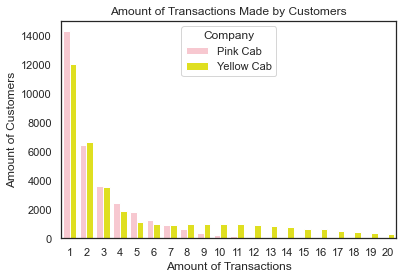

In [197]:
plot = sns.countplot(x = 'Count', hue = 'Company', palette = ['pink', 'yellow'], data = plotdata3[plotdata3['Count'] <= 20])
plt.xlabel('Amount of Transactions')
plt.ylabel('Amount of Customers')
plt.title('Amount of Transactions Made by Customers')
plt.show()

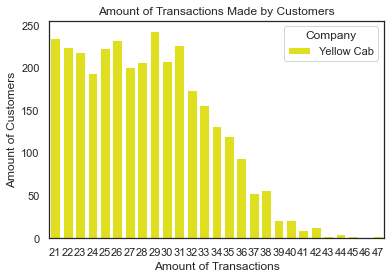

In [198]:
plot = sns.countplot(x = 'Count', hue = 'Company', palette = ['yellow'], data = plotdata3[plotdata3['Count'] > 20])
plt.xlabel('Amount of Transactions')
plt.ylabel('Amount of Customers')
plt.title('Amount of Transactions Made by Customers')
plt.show()